#### Унитарное кодирование

Преобразование категориального признака в несколько бинарных признаков

#### Загрузка набора данных World Population

In [1]:
import pandas as pd

countries = pd.read_csv(
    "data/world-population-by-country-2020.csv", index_col="no"
)

countries["Population2020"] = countries["Population2020"].apply(
    lambda x: int("".join(x.split(",")))
)
countries["Net Change"] = countries["NetChange"].apply(
    lambda x: int("".join(x.split(",")))
)
countries["Yearly"] = countries["Yearly"].apply(
    lambda x: float("".join(x.rstrip("%")))
)
countries["LandArea"] = countries["LandArea"].apply(
    lambda x: int("".join(x.split(",")))
)
countries

Country  Population2020  Yearly   NetChange Density  LandArea  \
no                                                                            
1               China      1439323776    0.39   5,540,090     153   9388211   
2               India      1380004385    0.99  13,586,631     464   2973190   
3       United States       331002651    0.59   1,937,734      36   9147420   
4           Indonesia       273523615    1.07   2,898,047     151   1811570   
5            Pakistan       220892340    2.00   4,327,022     287    770880   
..                ...             ...     ...         ...     ...       ...   
231        Montserrat            4992    0.06           3      50       100   
232  Falkland Islands            3480    3.05         103       0     12170   
233              Niue            1626    0.68          11       6       260   
234           Tokelau            1357    1.27          17     136        10   
235          Holy See             801    0.25           2   2,003         0   

     Migrants FertRate MedAge UrbanPop WorldShare  Net Change  
no                                                             
1    -348,399      1.7     38      61%     18.47%     5540090  
2    -532,687      2.2     28      35%     17.70%    13586631  
3     954,806      1.8     38      83%      4.25%     1937734  
4     -98,955      2.3     30      56%      3.51%     2898047  
5    -233,379      3.6     23      35%      2.83%     4327022  
..        ...      ...    ...      ...        ...         ...  
231       NaN     N.A.   N.A.      10%      0.00%           3  
232       NaN     N.A.   N.A.      66%      0.00%         103  
233       NaN     N.A.   N.A.      46%      0.00%          11  
234       NaN     N.A.   N.A.       0%      0.00%          17  
235       NaN     N.A.   N.A.     N.A.      0.00%           2  

[235 rows x 12 columns]

#### Унитарное кодирование признаков Пол (Sex) и Порт посадки (Embarked)

Кодирование

In [2]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np

# encoder = OneHotEncoder(sparse_output=False, drop="first")

# encoded_values = encoder.fit_transform(titanic[["Embarked", "Sex"]])

# encoded_columns = encoder.get_feature_names_out(["Embarked", "Sex"])

# encoded_values_df = pd.DataFrame(encoded_values, columns=encoded_columns)

# encoded_values_df

Добавление признаков в исходный Dataframe

In [3]:
# titanic = pd.concat([titanic, encoded_values_df], axis=1)

# titanic

#### Дискретизация признаков

Равномерное разделение данных на 3 группы

In [4]:
labels = ["Small", "Middle", "Big"]
num_bins = 3

In [5]:
hist1, bins1 = np.histogram(
    countries["LandArea"].fillna(countries["LandArea"].median()), bins=num_bins
)
bins1, hist1

(array([       0.        ,  5458956.66666667, 10917913.33333333,
        16376870.        ]),
 array([229,   5,   1]))

In [6]:
pd.concat(
    [countries["LandArea"], pd.cut(countries["LandArea"], list(bins1))], axis=1
).head(20)

LandArea                     LandArea
no                                       
1    9388211  (5458956.667, 10917913.333]
2    2973190           (0.0, 5458956.667]
3    9147420  (5458956.667, 10917913.333]
4    1811570           (0.0, 5458956.667]
5     770880           (0.0, 5458956.667]
6    8358140  (5458956.667, 10917913.333]
7     910770           (0.0, 5458956.667]
8     130170           (0.0, 5458956.667]
9   16376870   (10917913.333, 16376870.0]
10   1943950           (0.0, 5458956.667]
11    364555           (0.0, 5458956.667]
12   1000000           (0.0, 5458956.667]
13    298170           (0.0, 5458956.667]
14    995450           (0.0, 5458956.667]
15    310070           (0.0, 5458956.667]
16   2267050           (0.0, 5458956.667]
17    769630           (0.0, 5458956.667]
18   1628550           (0.0, 5458956.667]
19    348560           (0.0, 5458956.667]
20    510890           (0.0, 5458956.667]

In [7]:
pd.concat([countries["LandArea"], pd.cut(countries["LandArea"], list(bins1), labels=labels)], axis=1).head(20)

LandArea LandArea
no                   
1    9388211   Middle
2    2973190    Small
3    9147420   Middle
4    1811570    Small
5     770880    Small
6    8358140   Middle
7     910770    Small
8     130170    Small
9   16376870      Big
10   1943950    Small
11    364555    Small
12   1000000    Small
13    298170    Small
14    995450    Small
15    310070    Small
16   2267050    Small
17    769630    Small
18   1628550    Small
19    348560    Small
20    510890    Small

Равномерное разделение данных на 3 группы c установкой собственной границы диапазона значений (от 0 до 100)

In [8]:
labels = ["Small", "Middle", "Big"]
bins2 = np.linspace(0, 12000000, 4)

tmp_bins2 = np.digitize(
    countries["LandArea"].fillna(countries["LandArea"].median()), bins2
)

hist2 = np.bincount(tmp_bins2 - 1)

bins2, hist2

(array([       0.,  4000000.,  8000000., 12000000.]),
 array([229,   1,   4,   1]))

In [9]:
pd.concat([countries["LandArea"], pd.cut(countries["LandArea"], list(bins2))], axis=1).head(20)

LandArea                 LandArea
no                                   
1    9388211  (8000000.0, 12000000.0]
2    2973190         (0.0, 4000000.0]
3    9147420  (8000000.0, 12000000.0]
4    1811570         (0.0, 4000000.0]
5     770880         (0.0, 4000000.0]
6    8358140  (8000000.0, 12000000.0]
7     910770         (0.0, 4000000.0]
8     130170         (0.0, 4000000.0]
9   16376870                      NaN
10   1943950         (0.0, 4000000.0]
11    364555         (0.0, 4000000.0]
12   1000000         (0.0, 4000000.0]
13    298170         (0.0, 4000000.0]
14    995450         (0.0, 4000000.0]
15    310070         (0.0, 4000000.0]
16   2267050         (0.0, 4000000.0]
17    769630         (0.0, 4000000.0]
18   1628550         (0.0, 4000000.0]
19    348560         (0.0, 4000000.0]
20    510890         (0.0, 4000000.0]

In [10]:
pd.concat(
    [countries["LandArea"], pd.cut(countries["LandArea"], list(bins2), labels=labels)],
    axis=1,
).head(20)

LandArea LandArea
no                   
1    9388211      Big
2    2973190    Small
3    9147420      Big
4    1811570    Small
5     770880    Small
6    8358140      Big
7     910770    Small
8     130170    Small
9   16376870      NaN
10   1943950    Small
11    364555    Small
12   1000000    Small
13    298170    Small
14    995450    Small
15    310070    Small
16   2267050    Small
17    769630    Small
18   1628550    Small
19    348560    Small
20    510890    Small

Равномерное разделение данных на 3 группы c установкой собственных интервалов (0 - 39, 40 - 60, 61 - 100)

In [11]:
labels2 = ["Dwarf", "Small", "Middle", "Big", "Giant"]
hist3, bins3 = np.histogram(

    countries["LandArea"].fillna(countries["LandArea"].median()), bins=[0, 1000, 100000, 500000, 3000000, np.inf]
)


bins3, hist3

(array([0.e+00, 1.e+03, 1.e+05, 5.e+05, 3.e+06,    inf]),
 array([52, 77, 56, 44,  6]))

In [12]:
pd.concat([countries["LandArea"], pd.cut(countries["LandArea"], list(bins3))], axis=1).head(20)

LandArea               LandArea
no                                 
1    9388211       (3000000.0, inf]
2    2973190  (500000.0, 3000000.0]
3    9147420       (3000000.0, inf]
4    1811570  (500000.0, 3000000.0]
5     770880  (500000.0, 3000000.0]
6    8358140       (3000000.0, inf]
7     910770  (500000.0, 3000000.0]
8     130170   (100000.0, 500000.0]
9   16376870       (3000000.0, inf]
10   1943950  (500000.0, 3000000.0]
11    364555   (100000.0, 500000.0]
12   1000000  (500000.0, 3000000.0]
13    298170   (100000.0, 500000.0]
14    995450  (500000.0, 3000000.0]
15    310070   (100000.0, 500000.0]
16   2267050  (500000.0, 3000000.0]
17    769630  (500000.0, 3000000.0]
18   1628550  (500000.0, 3000000.0]
19    348560   (100000.0, 500000.0]
20    510890  (500000.0, 3000000.0]

In [13]:
pd.concat(
    [countries["LandArea"], pd.cut(countries["LandArea"], list(bins3), labels=labels2)],
    axis=1,
).head(20)

LandArea LandArea
no                   
1    9388211    Giant
2    2973190      Big
3    9147420    Giant
4    1811570      Big
5     770880      Big
6    8358140    Giant
7     910770      Big
8     130170   Middle
9   16376870    Giant
10   1943950      Big
11    364555   Middle
12   1000000      Big
13    298170   Middle
14    995450      Big
15    310070   Middle
16   2267050      Big
17    769630      Big
18   1628550      Big
19    348560   Middle
20    510890      Big

Квантильное разделение данных на 5 групп


In [14]:
pd.concat([countries["LandArea"], pd.qcut(countries["LandArea"], q=5, labels=False)], axis=1).head(20)

LandArea  LandArea
no                    
1    9388211         4
2    2973190         4
3    9147420         4
4    1811570         4
5     770880         4
6    8358140         4
7     910770         4
8     130170         2
9   16376870         4
10   1943950         4
11    364555         3
12   1000000         4
13    298170         3
14    995450         4
15    310070         3
16   2267050         4
17    769630         4
18   1628550         4
19    348560         3
20    510890         3

In [15]:
pd.concat([countries["LandArea"], pd.qcut(countries["LandArea"], q=5, labels=labels2)], axis=1).head(20)

LandArea LandArea
no                   
1    9388211    Giant
2    2973190    Giant
3    9147420    Giant
4    1811570    Giant
5     770880    Giant
6    8358140    Giant
7     910770    Giant
8     130170   Middle
9   16376870    Giant
10   1943950    Giant
11    364555      Big
12   1000000    Giant
13    298170      Big
14    995450    Giant
15    310070      Big
16   2267050    Giant
17    769630    Giant
18   1628550    Giant
19    348560      Big
20    510890      Big

#### Пример конструирования признаков на основе существующих

Title - обращение к пассажиру (Mr, Mrs, Miss)

Is_married - замужняя ли женщина

Cabin_type - палуба (тип каюты)

In [16]:
# titanic_cl = titanic.drop(
#     ["Embarked_Q", "Embarked_S", "Embarked_nan", "Sex_male"], axis=1, errors="ignore"
# )
# titanic_cl = titanic_cl.dropna()

# titanic_cl["Title"] = [
#     i.split(",")[1].split(".")[0].strip() for i in titanic_cl["Name"]
# ]

# titanic_cl["Is_married"] = [1 if i == "Mrs" else 0 for i in titanic_cl["Title"]]

# titanic_cl["Cabin_type"] = [i[0] for i in titanic_cl["Cabin"]]

# titanic_cl

#### Пример использования библиотеки Featuretools для автоматического конструирования (синтеза) признаков

https://featuretools.alteryx.com/en/stable/getting_started/using_entitysets.html

#### Загрузка данных

In [17]:
import featuretools as ft
from woodwork.logical_types import Categorical, Datetime

info = pd.read_csv("data/world-population-by-country-2020.csv")
forcast = pd.read_csv("data/world-population-forcast-2020-2050.csv")
capitals = pd.read_csv("data/countries-continents-capitals.csv", encoding="ISO-8859-1")
forcast["Population"] = forcast["Population"].apply(
    lambda x: int("".join(x.split(",")))
)
forcast["YearlyPer"] = forcast["YearlyPer"].apply(
    lambda x: float("".join(x.rstrip("%")))
)
forcast["Yearly"] = forcast["Yearly"].apply(
    lambda x: int("".join(x.split(",")))
)
info = info.drop(["Migrants", "FertRate", "MedAge", "UrbanPop", "WorldShare"], axis=1)
info["Population2020"] = info["Population2020"].apply(
    lambda x: int("".join(x.split(",")))
)
info["Yearly"] = info["Yearly"].apply(
    lambda x: float("".join(x.rstrip("%")))
)
info["NetChange"] = info["NetChange"].apply(
    lambda x: int("".join(x.split(",")))
)
info["LandArea"] = info["LandArea"].apply(
    lambda x: int("".join(x.split(",")))
)

info, forcast, capitals

c:\Users\frenk\OneDrive\Рабочий стол\MII_Salin_Oleg_PIbd-33\.venv\Lib\site-packages\featuretools\entityset\entityset.py:1379: SyntaxWarning: invalid escape sequence '\l'
  columns_string = "\l".join(column_typing_info)  # noqa: W605
c:\Users\frenk\OneDrive\Рабочий стол\MII_Salin_Oleg_PIbd-33\.venv\Lib\site-packages\featuretools\entityset\entityset.py:1381: SyntaxWarning: invalid escape sequence '\l'
  label = "{%s (%d row%s)|%s\l}" % (  # noqa: W605


(      no           Country  Population2020  Yearly  NetChange Density  \
 0      1             China      1439323776    0.39    5540090     153   
 1      2             India      1380004385    0.99   13586631     464   
 2      3     United States       331002651    0.59    1937734      36   
 3      4         Indonesia       273523615    1.07    2898047     151   
 4      5          Pakistan       220892340    2.00    4327022     287   
 ..   ...               ...             ...     ...        ...     ...   
 230  231        Montserrat            4992    0.06          3      50   
 231  232  Falkland Islands            3480    3.05        103       0   
 232  233              Niue            1626    0.68         11       6   
 233  234           Tokelau            1357    1.27         17     136   
 234  235          Holy See             801    0.25          2   2,003   
 
      LandArea  
 0     9388211  
 1     2973190  
 2     9147420  
 3     1811570  
 4      770880  
 ..     

#### Создание сущностей в featuretools

Добавление dataframe'ов с данными в EntitySet с указанием параметров: название сущности (таблицы), первичный ключ, категориальные атрибуты (в том числе даты)

In [18]:
es = ft.EntitySet(id="countries")

es = es.add_dataframe(
    dataframe_name="countries",
    dataframe=info,
    index="no",
    logical_types={
        "Country": Categorical,
    },
)
es = es.add_dataframe(
    dataframe_name="capitals",
    dataframe=capitals,
    index="Country",
    logical_types={
        "Country": Categorical,
        "Capital": Categorical,
        "Continent": Categorical,
    },
)
es = es.add_dataframe(
    dataframe_name="forcast",
    dataframe=forcast,
    index="forcast_id",
    make_index=True,
    logical_types={
        "Year": Datetime,
    },
)

es

c:\Users\frenk\OneDrive\Рабочий стол\MII_Salin_Oleg_PIbd-33\.venv\Lib\site-packages\woodwork\type_sys\utils.py:33: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(
c:\Users\frenk\OneDrive\Рабочий стол\MII_Salin_Oleg_PIbd-33\.venv\Lib\site-packages\woodwork\type_sys\utils.py:33: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(


Entityset: countries
  DataFrames:
    countries [Rows: 235, Columns: 7]
    capitals [Rows: 234, Columns: 3]
    forcast [Rows: 7, Columns: 8]
  Relationships:
    No relationships

#### Настройка связей между сущностями featuretools

Настройка связей между таблицами на уровне ключей

Связь указывается от родителя к потомкам (таблица-родитель, первичный ключ, таблица-потомок, внешний ключ)

In [19]:
es = es.add_relationship("capitals", "Country", "countries", "Country")

es

Entityset: countries
  DataFrames:
    countries [Rows: 235, Columns: 7]
    capitals [Rows: 234, Columns: 3]
    forcast [Rows: 7, Columns: 8]
  Relationships:
    countries.Country -> capitals.Country

#### Автоматическое конструирование признаков с помощью featuretools

Библиотека применят различные функции агрегации и трансформации к атрибутам таблицы order_items с учетом отношений

Результат помещается в Dataframe feature_matrix

In [20]:
feature_matrix, feature_defs = ft.dfs(
    entityset=es,
    target_dataframe_name="countries",
    max_depth=1,
)

feature_matrix

Country  Population2020  Yearly  NetChange  LandArea  \
no                                                                   
1               China      1439323776    0.39    5540090   9388211   
2               India      1380004385    0.99   13586631   2973190   
3       United States       331002651    0.59    1937734   9147420   
4           Indonesia       273523615    1.07    2898047   1811570   
5            Pakistan       220892340    2.00    4327022    770880   
..                ...             ...     ...        ...       ...   
231        Montserrat            4992    0.06          3       100   
232  Falkland Islands            3480    3.05        103     12170   
233              Niue            1626    0.68         11       260   
234           Tokelau            1357    1.27         17        10   
235          Holy See             801    0.25          2         0   

     capitals.Capital capitals.Continent  
no                                        
1             Beijing               Asia  
2           New Delhi               Asia  
3    Washington, D.C.      North America  
4             Jakarta               Asia  
5           Islamabad               Asia  
..                ...                ...  
231            Brades      North America  
232           Stanley      South America  
233             Alofi            Oceania  
234          Nukunonu            Oceania  
235               NaN                NaN  

[235 rows x 7 columns]

#### Полученные признаки

Список колонок полученного dataframe'а

In [21]:
feature_defs

[<Feature: Country>,
 <Feature: Population2020>,
 <Feature: Yearly>,
 <Feature: NetChange>,
 <Feature: LandArea>,
 <Feature: capitals.Capital>,
 <Feature: capitals.Continent>]

#### Отсечение значений признаков

Определение выбросов с помощью boxplot

<Axes: >

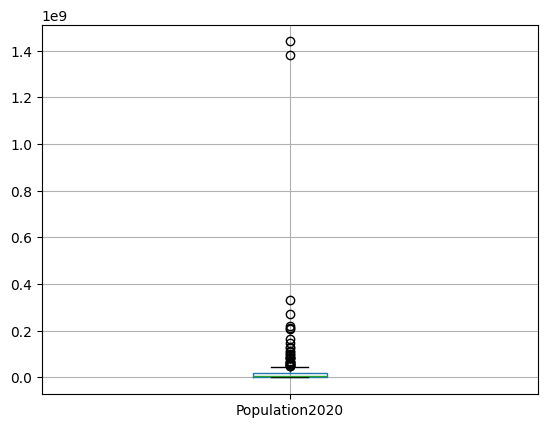

In [22]:
countries.boxplot(column="Population2020")

Отсечение данных для признака Население, значение которых больше 50000000


In [23]:
countries_norm = countries.copy()

countries_norm["PopulationClip"] = countries_norm["Population2020"].clip(0, 50000000)

countries_norm[countries_norm["Population2020"] > 50000000][
    ["Country", "Population2020", "PopulationClip"]
]

Country  Population2020  PopulationClip
no                                                
1            China      1439323776        50000000
2            India      1380004385        50000000
3    United States       331002651        50000000
4        Indonesia       273523615        50000000
5         Pakistan       220892340        50000000
6           Brazil       212559417        50000000
7          Nigeria       206139589        50000000
8       Bangladesh       164689383        50000000
9           Russia       145934462        50000000
10          Mexico       128932753        50000000
11           Japan       126476461        50000000
12        Ethiopia       114963588        50000000
13     Philippines       109581078        50000000
14           Egypt       102334404        50000000
15         Vietnam        97338579        50000000
16        DR Congo        89561403        50000000
17          Turkey        84339067        50000000
18            Iran        83992949        50000000
19         Germany        83783942        50000000
20        Thailand        69799978        50000000
21  United Kingdom        67886011        50000000
22          France        65273511        50000000
23           Italy        60461826        50000000
24        Tanzania        59734218        50000000
25    South Africa        59308690        50000000
26         Myanmar        54409800        50000000
27           Kenya        53771296        50000000
28     South Korea        51269185        50000000
29        Colombia        50882891        50000000

Винсоризация признака Возраст

In [24]:
from scipy.stats.mstats import winsorize

print(countries_norm["Population2020"].quantile(q=0.95))

countries_norm["PopulationWinsorized"] = winsorize(
    countries_norm["Population2020"].fillna(countries_norm["Population2020"].mean()),
    (0, 0.05),
    inplace=False,
)

countries_norm[countries_norm["Population2020"] > 50000000][
    ["Country", "Population2020", "PopulationWinsorized"]
]

111195830.99999991


Country  Population2020  PopulationWinsorized
no                                                      
1            China      1439323776             114963588
2            India      1380004385             114963588
3    United States       331002651             114963588
4        Indonesia       273523615             114963588
5         Pakistan       220892340             114963588
6           Brazil       212559417             114963588
7          Nigeria       206139589             114963588
8       Bangladesh       164689383             114963588
9           Russia       145934462             114963588
10          Mexico       128932753             114963588
11           Japan       126476461             114963588
12        Ethiopia       114963588             114963588
13     Philippines       109581078             109581078
14           Egypt       102334404             102334404
15         Vietnam        97338579              97338579
16        DR Congo        89561403              89561403
17          Turkey        84339067              84339067
18            Iran        83992949              83992949
19         Germany        83783942              83783942
20        Thailand        69799978              69799978
21  United Kingdom        67886011              67886011
22          France        65273511              65273511
23           Italy        60461826              60461826
24        Tanzania        59734218              59734218
25    South Africa        59308690              59308690
26         Myanmar        54409800              54409800
27           Kenya        53771296              53771296
28     South Korea        51269185              51269185
29        Colombia        50882891              50882891

#### Нормализация значений

In [25]:
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()

min_max_scaler_2 = preprocessing.MinMaxScaler(feature_range=(-1, 1))

countries_norm["PopulationNorm"] = min_max_scaler.fit_transform(
    countries_norm["Population2020"].to_numpy().reshape(-1, 1)
).reshape(countries_norm["Population2020"].shape)

countries_norm["PopulationClipNorm"] = min_max_scaler.fit_transform(
    countries_norm["PopulationClip"].to_numpy().reshape(-1, 1)
).reshape(countries_norm["Population2020"].shape)

countries_norm["PopulationWinsorizedNorm"] = min_max_scaler.fit_transform(
    countries_norm["PopulationWinsorized"].to_numpy().reshape(-1, 1)
).reshape(countries_norm["Population2020"].shape)

countries_norm["PopulationWinsorizedNorm2"] = min_max_scaler_2.fit_transform(
    countries_norm["PopulationWinsorized"].to_numpy().reshape(-1, 1)
).reshape(countries_norm["Population2020"].shape)

countries_norm[
    [
        "Country",
        "Population2020",
        "PopulationNorm",
        "PopulationClipNorm",
        "PopulationWinsorizedNorm",
        "PopulationWinsorizedNorm2",
    ]
]

Country  Population2020  PopulationNorm  PopulationClipNorm  \
no                                                                          
1               China      1439323776    1.000000e+00            1.000000   
2               India      1380004385    9.587866e-01            1.000000   
3       United States       331002651    2.299705e-01            1.000000   
4           Indonesia       273523615    1.900357e-01            1.000000   
5            Pakistan       220892340    1.534691e-01            1.000000   
..                ...             ...             ...                 ...   
231        Montserrat            4992    2.911786e-06            0.000084   
232  Falkland Islands            3480    1.861292e-06            0.000054   
233              Niue            1626    5.731862e-07            0.000017   
234           Tokelau            1357    3.862927e-07            0.000011   
235          Holy See             801    0.000000e+00            0.000000   

     PopulationWinsorizedNorm  PopulationWinsorizedNorm2  
no                                                        
1                    1.000000                   1.000000  
2                    1.000000                   1.000000  
3                    1.000000                   1.000000  
4                    1.000000                   1.000000  
5                    1.000000                   1.000000  
..                        ...                        ...  
231                  0.000036                  -0.999927  
232                  0.000023                  -0.999953  
233                  0.000007                  -0.999986  
234                  0.000005                  -0.999990  
235                  0.000000                  -1.000000  

[235 rows x 6 columns]

#### Стандартизация значений

In [27]:
from sklearn import preprocessing

stndart_scaler = preprocessing.StandardScaler()

countries_norm["PopulationStand"] = stndart_scaler.fit_transform(
    countries_norm["Population2020"].to_numpy().reshape(-1, 1)
).reshape(countries_norm["Population2020"].shape)

countries_norm["PopulationClipStand"] = stndart_scaler.fit_transform(
    countries_norm["PopulationClip"].to_numpy().reshape(-1, 1)
).reshape(countries_norm["Population2020"].shape)

countries_norm["PopulationWinsorizedStand"] = stndart_scaler.fit_transform(
    countries_norm["PopulationWinsorized"].to_numpy().reshape(-1, 1)
).reshape(countries_norm["Population2020"].shape)

countries_norm[
    [
        "Country",
        "Population2020",
        "PopulationStand",
        "PopulationClipStand",
        "PopulationWinsorizedStand",
    ]
]

Country  Population2020  PopulationStand  PopulationClipStand  \
no                                                                            
1               China      1439323776        10.427597             2.073933   
2               India      1380004385         9.987702             2.073933   
3       United States       331002651         2.208627             2.073933   
4           Indonesia       273523615         1.782380             2.073933   
5            Pakistan       220892340         1.392082             2.073933   
..                ...             ...              ...                  ...   
231        Montserrat            4992        -0.245950            -0.795071   
232  Falkland Islands            3480        -0.245962            -0.795158   
233              Niue            1626        -0.245975            -0.795265   
234           Tokelau            1357        -0.245977            -0.795280   
235          Holy See             801        -0.245982            -0.795312   

     PopulationWinsorizedStand  
no                              
1                     3.171659  
2                     3.171659  
3                     3.171659  
4                     3.171659  
5                     3.171659  
..                         ...  
231                  -0.621969  
232                  -0.622019  
233                  -0.622080  
234                  -0.622089  
235                  -0.622107  

[235 rows x 5 columns]